<a href="https://colab.research.google.com/github/victorariza/ExData_Plotting1/blob/master/vAriza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human resources analysis

Human Resources department asks for help to develop an analysis about the employees of the company. 
They want to analyze different aspects to identify some improvement areas. 
To do so, they have provided us with a dataset with a lot of information. 

Let's start with the analysis!!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset: 

In [ ]:
## import PyDrive to read a csv from google drive

!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
## read google drive by the link below
link = 'https://drive.google.com/file/d/1YcZWp0NwUZ7wFnzDKzq7cLBHkdgsKgfQ/view?usp=sharing'
  
id = link.split("/")[-2] # get the id of the file from the url
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('RRHH.csv')   

In [ ]:
# read RRHH.csv into pandas
hr_data = pd.read_csv('RRHH.csv') 

We can use the following option to show all columns in the dataset

In [ ]:
pd.set_option('display.max_columns',None)
hr_data.head(1) # this way we show all the columns and the values of the first row

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.6,5,0,2019-01-17,0,1,39


In [ ]:
# this way we print all the column names
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences', 'Age'],
      dtype='object')

How many rows and columns are there?

In [ ]:
# we print both the number of columns and rows
print("The dataset has " + str(len(hr_data.columns)) + " columns")
print("The dataset has " + str(len(hr_data)) + " rows")

The dataset has 36 columns
The dataset has 311 rows


## Clean up the data

You should delete duplicate rows and missing values. 

In [ ]:
# we delete the duplicate rows
hr_data = hr_data.drop_duplicates()
print("The new dataset has " + str(len(hr_data)) + " rows")

The new dataset has 311 rows


In [ ]:
# we look for missing values
missing_values=hr_data.isna().sum()
print(missing_values)

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

## Data exploration

What is the average age of employees?

In [ ]:
# we calculate the average age of all employees
print("The average age of all empolyees is: " + str(round(hr_data.Age.mean(),2)))

The average age of all empolyees is: 40.42


How many women and men are there? Female-Male Gender Ratio within the company.

In [ ]:
# we calculate the number of men and women, I suppose the id 0 is for men and 1 is for women
men_number = len(hr_data[hr_data.GenderID == 0])
women_number = len(hr_data[hr_data.GenderID == 1])

print("There are " + str(men_number) + " employees that are men")
print("There are " + str(women_number) + " employees that are women")
print("The Gender ratio is " + str(round((men_number / women_number)*100, 2))  + " males per 100 females")

There are 176 employees that are men
There are 135 employees that are women
The Gender ratio is 130.37 males per 100 females


Now, we are going to plot this information and to do so, we will use **countplot()** function. 

Seaborn **countplot()** method can be used to show the counts of observations in each categorical bin using bars.
- x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.
- hue : (optional) This parameter take column name for colour encoding.
- data : (optional) This parameter take DataFrame, array, or list of arrays, Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.
- order, hue_order : (optional) This parameter take lists of strings. Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
- orient : (optional)This parameter take “v” | “h”, Orientation of the plot (vertical or horizontal). 
- color : (optional) This parameter take matplotlib color, Color for all of the elements, or seed for a gradient palette.
- palette : (optional) This parameter take palette name, list, or dict, Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
- saturation : (optional) This parameter take float value, Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.
- dodge : (optional) This parameter take bool value, When hue nesting is used, whether elements should be shifted along the categorical axis.
- ax : (optional) This parameter take matplotlib Axes, Axes object to draw the plot onto, otherwise uses the current Axes.
- kwargs : This parameter take key, value mappings, Other keyword arguments are passed through to matplotlib.axes.Axes.bar().

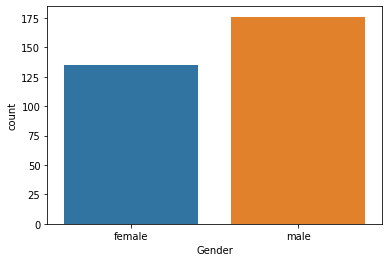

In [ ]:
# count plot on gender (male and feamle)
hr_data.loc[hr_data["GenderID"] == 0, "Gender"] = "male"
hr_data.loc[hr_data["GenderID"] == 1, "Gender"] = "female"
sns.countplot(x = "Gender", data = hr_data)

Show in a graph the comparison between the women and men married and those who don't.  

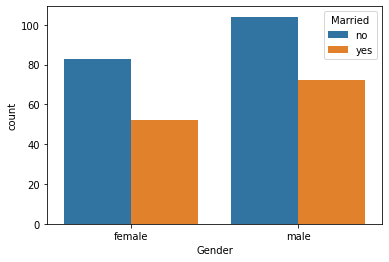

In [ ]:
# count plot on gender and married status

hr_data.loc[hr_data["MarriedID"] == 1, "Married"] = "yes"
hr_data.loc[hr_data["MarriedID"] == 0, "Married"] = "no"

sns.countplot(x="Gender", hue="Married", data=hr_data)

We want to analyze our employees' marital situation (see *MaritalDesc* column).  

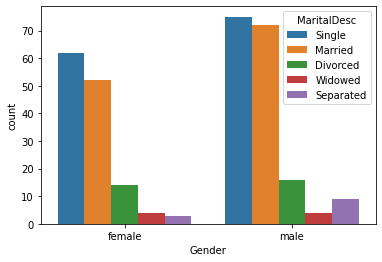

In [ ]:
# count plot on gender and Marital Description
sns.countplot(x="Gender", hue="MaritalDesc", data=hr_data)

The company wants also to know the age Distribution of employees. Create a graph to show it. 

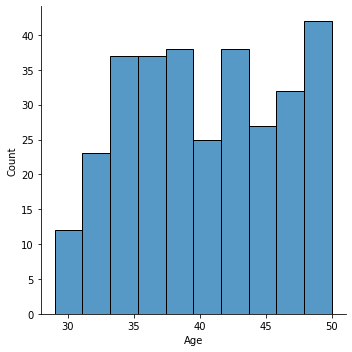

In [ ]:
# plot the age distribution
sns.displot(data=hr_data, x="Age")


Show the number of employees in each department (using DeptID column). 

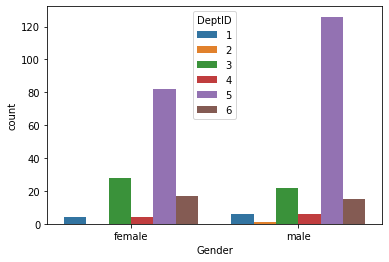

In [ ]:
sns.countplot(x="Gender", hue="DeptID", data=hr_data)

Show the distribution among departments (using Department column). Create a bar chart and a pie chart to show this information. 

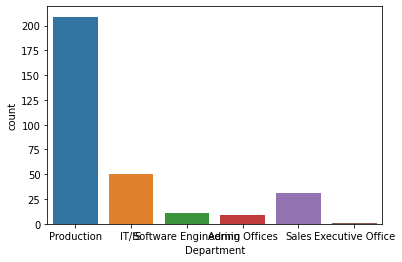

In [ ]:
sns.countplot(x = "Department", data = hr_data)

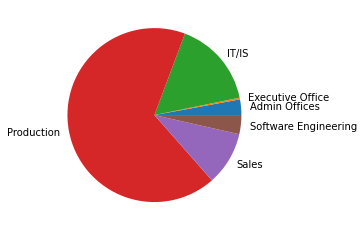

In [ ]:
# create a dataframe with the number of employees per deparment 
employees_by_department = hr_data.groupby('Department')["Department"].count().reset_index(name="count")
  
# displaying chart
plt.pie(employees_by_department["count"], labels=employees_by_department["Department"])
plt.show()

Could you show in a graph the number of women and men by department? 

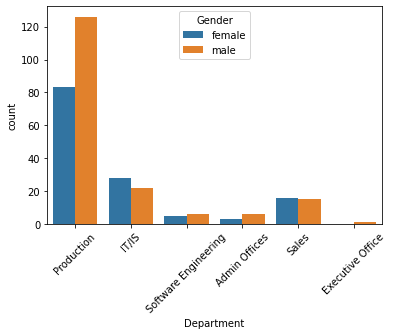

In [ ]:
# Count plot Gender per deparment
chart = sns.countplot(x = "Department", hue="Gender", data = hr_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

The company wants to ensure diversity across the departments. Could you calculate the number of people for each race per Department? Could you get a graph to show the current diversity distribution by department?  

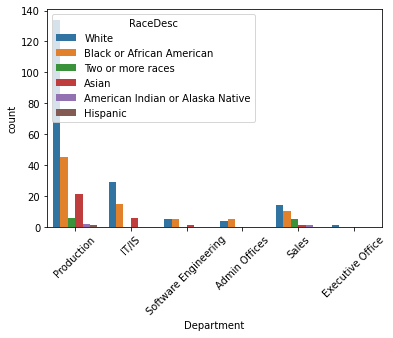

In [ ]:
# Count plot race per deparment
chart = sns.countplot(x = "Department", hue="RaceDesc", data = hr_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

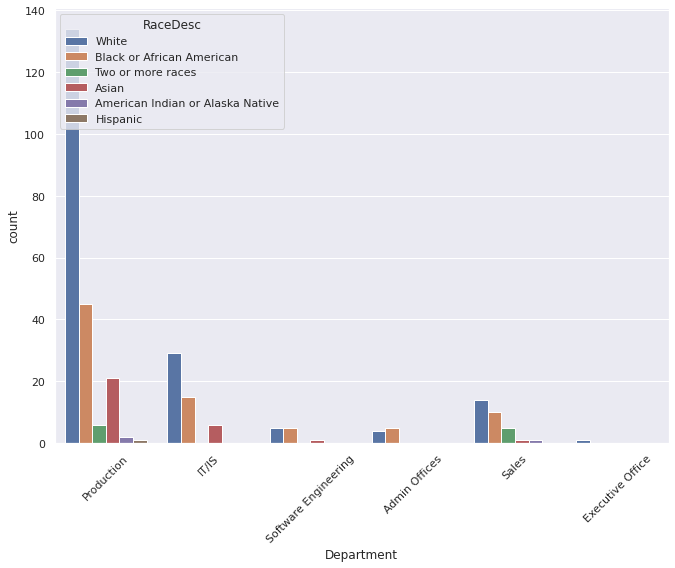

In [ ]:
# Set figure size (width, height) in inches
sns.set(rc={'figure.figsize':(11,8)})

chart = sns.countplot(x = "Department", hue="RaceDesc", data = hr_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

Now, the company wants to analyze the number of women and men in each position. 

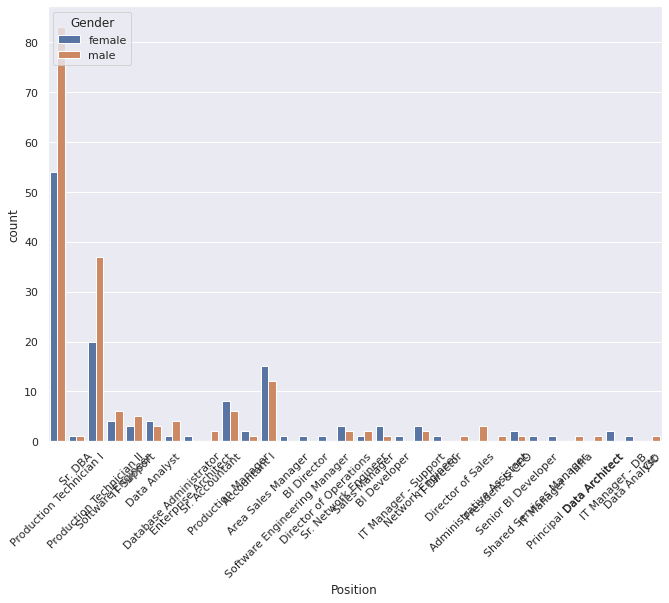

In [ ]:
# Count plot race per deparment
chart = sns.countplot(x = "Position", hue="Gender", data = hr_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

Could you show the distribution of employees by Position column?

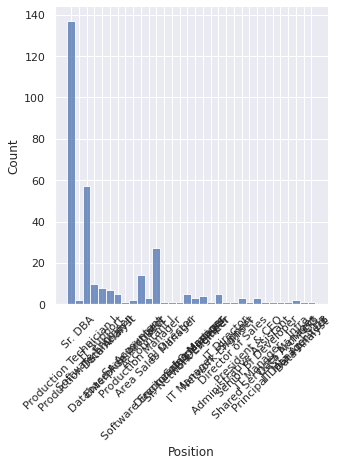

In [ ]:
# plot the age distribution
chart = sns.displot(data=hr_data, x="Position")
chart.set_xticklabels(rotation=45)


The company is also interested in analyzing the reasons why employees leave the company (TermReasons column). Which one is the main reason? 

In [ ]:
# Group by the reason to leave the company
employees_leave_reasons = hr_data.groupby('TermReason')["TermReason"].count().reset_index(name="count")
employees_leave_reasons = employees_leave_reasons.sort_values(by=['count'], ascending=False)

# Remoe Still employeed to hava a clear dataset
number_na_still_employed_str = "N/A-StillEmployed"
employees_leave_reasons = employees_leave_reasons[employees_leave_reasons['TermReason']!= number_na_still_employed_str]

# The main leave reason is the first row as we have ordered by the number of apereances in the original dataset
main_leave_reason = employees_leave_reasons["TermReason"].iloc[0]
percentage_main_leave_reason = round(((employees_leave_reasons["count"].iloc[0] / employees_leave_reasons["count"].sum()) * 100), 2)

print("The main reason for leaving the company is '" + main_leave_reason + "' with " + str(percentage_main_leave_reason) + "% of employees leaving the company for that reason")


The main reason for leaving the company is 'Another position' with 19.23% of employees leaving the company for that reason


Who have better performance in the company? Men or Women? 

In [ ]:
# Group by gender and calculate the mean of the numerical value PerfScoreID
performance_by_gender = hr_data.groupby('Gender')["PerfScoreID"].mean().reset_index(name="MeanPerformance")
performance_by_gender = performance_by_gender.sort_values(by=['MeanPerformance'], ascending=False)

# The top performance is the first row of the sorted dataset
top_performance_gender = performance_by_gender["Gender"].iloc[0]
top_mean_performance = performance_by_gender["MeanPerformance"].iloc[0]

print("The gender '" + top_performance_gender + "' performance better with an score of " + str(top_mean_performance))

The gender 'male' performance better with an score of 3.0056818181818183


Salary distribution based on Gender

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


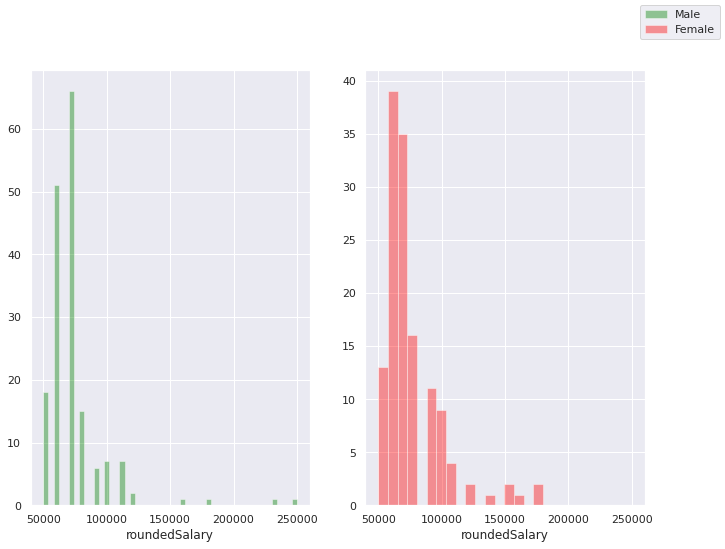

In [ ]:
# We round the salary up in each thousand so we can generate a distribution
hr_data["roundedSalary"] = hr_data['Salary']/10000
hr_data["roundedSalary"] = hr_data['roundedSalary'].apply(np.ceil)
hr_data["roundedSalary"] = hr_data['roundedSalary']*10000

# plot the salary distribution by gender
values_male = hr_data[hr_data["Gender"] == "male"]["roundedSalary"]
values_female = hr_data[hr_data["Gender"] == "female"]["roundedSalary"]
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
sns.distplot(values_male, ax=ax1, kde=False, color='green', label="Male")
sns.distplot(values_female, ax=ax2, kde=False, color='red', label="Female")
f.legend()
plt.show()


What other analysis could be interesting for the Human Resources department? 

Done!!